#DOCUMENTATION

#LIBRARIES

In [98]:
import pandas as pd
import numpy as np

import re

from transformers import BertTokenizerFast, AutoTokenizer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


#TOKINEZER

In [87]:
tokenizer = BertTokenizerFast.from_pretrained(
    "bert-base-uncased"
)

In [88]:
with open("positive10kUZ.txt", "r") as f:
  text_pos10 = f.read()

with open("negative10kUZ.txt", "r") as f:
  text_neg10 = f.read()

with open("UZ_negative.txt", "r") as f:
  text_neg = f.read()

with open("UZ_positive.txt", "r") as f:
  text_pos = f.read()

text = text_pos10 + text_neg10 + text_neg + text_pos
text=text.replace("\n"," ")
text = re.sub(r'[^a-zA-Z0-9 .,]', '', text)


text = text.lower()

In [89]:
def training_corpus():
  for i in range(0, len(text), 1000):
    yield text[i:i+1000]

In [90]:
old_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
training_corpus = training_corpus()

new_tokinizer = old_tokenizer.train_new_from_iterator(training_corpus, 15000)

vectorizer = CountVectorizer(tokenizer=new_tokinizer.tokenize)


#DATA REVIEW

In [91]:
data_pre = pd.read_csv("dataset.csv")

In [92]:
data_pre.sample(10)

,text,label
7396,o'yin-kulgi yo'q. ajablanarlisi no.unbelivable...,1
4447,menga nima kerak ..... tnkqu\n,1
17703,ilova doimiy ravishda qulab tushadi va jonli y...,0
486,bug'ni puflashning ajoyib usuli ... o'yinning ...,1
4666,"yaxshi, lekin hisobingizni saqlash uchun kerak...",1
5548,dunyodagi eng yaxshi o'yin ishlab chiquvchiga ...,1
513,amazing har qanday mobil o'yinda qidiraman. fa...,1
1914,fav fun 8-darajali boshlanadi\n,1
12619,bu hozirda pianino ijro etmaydi. bu birinchi p...,0
17627,"nonsense ikki marta yuklab qo'yildi, lekin uni...",0


#ML AND METRICS

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[LightGBM] [Info] Number of positive: 7984, number of negative: 8652
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.444635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5382
[LightGBM] [Info] Number of data points in the train set: 16636, number of used features: 1867
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.479923 -> initscore=-0.080351
[LightGBM] [Info] Start training from score -0.080351
Accuracy: 0.8604651162790697


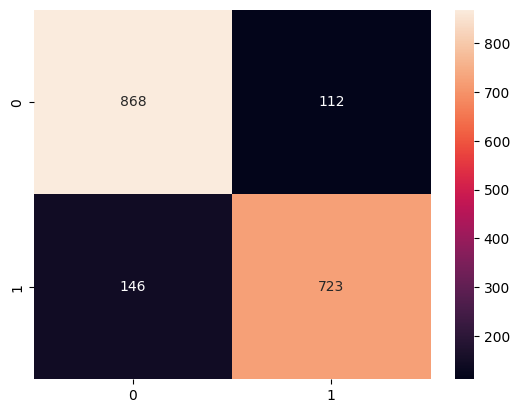

In [93]:
import matplotlib.pyplot as plt
X = data_pre["text"]
y = data_pre["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train_vectorized = vectorizer.fit_transform(X_train).astype(np.float32)
X_test_vectorized = vectorizer.transform(X_test).astype(np.float32)

model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


Accuracy: 0.8426176311519741


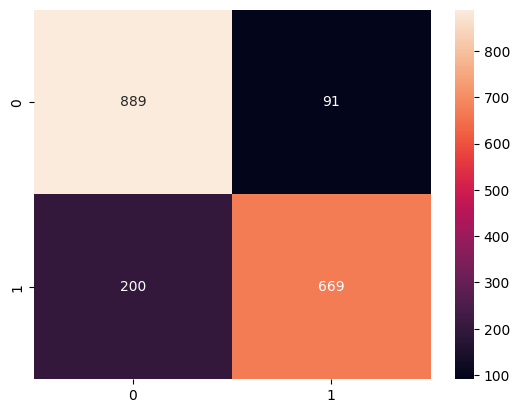

In [94]:
model_rf = RandomForestClassifier(n_estimators=50)
model_rf.fit(X_train_vectorized, y_train)

y_pred = model_rf.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8674959437533802


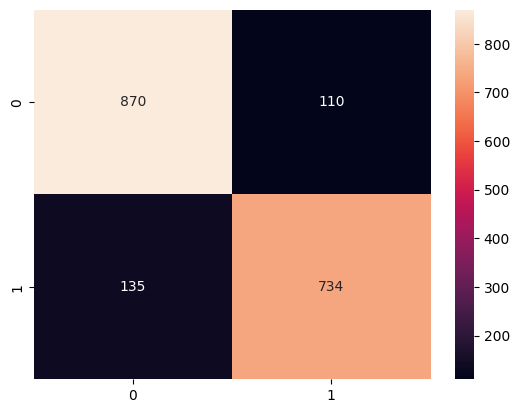

In [95]:
model_log = LogisticRegression()
model_log.fit(X_train_vectorized, y_train)

y_pred = model_log.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()